<div align='center'>
    <h1>线形的积分方程及其矩量法实现</h1>
</div>

<h2>积分方程<h2>

如下是经典的积分方程
$$
E^s(r)=j\omega\mu\int_{L'} {I(r')\dfrac{e^{-jkR}}{4\pi R}dl'}
+\dfrac{1}{j\omega\varepsilon}\nabla \int_{L'} \nabla'\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}dl'
$$
其中
$$R=|r-r'|$$

对积分方程进行测试后，就能得到
$$
\int_L f(r)\cdot E^s(r)dl = j\omega\mu\int_L\int_{L'} f(r)\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}dl'dl+
\dfrac{1}{j\omega\varepsilon} \int_{L}\int_{L'}  \nabla'\cdot I(r')f(r)\cdot \nabla\dfrac{e^{-jkR}}{4\pi R}dl'dl
$$
该式子等价于
$$
\int_L f(r)\cdot E^s(r)dl = j\omega\mu\int_L\int_{L'} f(r)\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}dl'dl
-\dfrac{1}{j\omega\varepsilon} \int_{L}\int_{L'}  \nabla'\cdot I(r')f(r)\cdot \nabla R \dfrac{1+jkR}{4\pi R^2}e^{-jkR}dl'dl
$$


将积分方程中出现的电流进行离散，就有
$$
\int_L f_n(r)\cdot E^s(r)dl = j\omega\mu\sum_m\int_L\int_{L'} f_n(r)\cdot J_m(r')\dfrac{e^{-jkR}}{4\pi R}dl'dl
-
\dfrac{1}{j\omega\varepsilon} \sum_m\int_{L}\int_{L'}  \nabla'\cdot J_m(r')f_n(r)\cdot (r-r')\dfrac{(1+jkR)}{4\pi R^3}e^{-jkR}dl'dl
$$

上述的测试和离散有很多的办法。在这里介绍点配法
$$
\dfrac{r_n-r_{n-1}}{|r_n-r_{n-1}|}\cdot E^s(r_n^c) = j\omega\mu\sum_m I_m \dfrac{r_n-r_{n-1}}{|r_n-r_{n-1}|}\cdot \dfrac{r_m'-r_{m-1}'}{|r_m'-r_{m-1}'|}\int_{L'} \dfrac{e^{-jkR}}{4\pi R}dl'
-
\dfrac{1}{j\omega\varepsilon}  \sum_m  I_m \dfrac{r_n-r_{n-1}}{|r_n-r_{n-1}|}\cdot (r_n^c-r')\dfrac{(1+jkR)}{4\pi R^3}e^{-jkR}\left|_{r'=r_{m}'}^{r'=r_{m-1}'}\right.
$$
其中
$$
R = |r_n^c-r'|
$$ 
$$
r_n^c = (r_n+r_{n-1})/2+a_n
$$
其中$a_n$是一种偏置，可以是第$n-$线段的厚度、半径或其他

上面的公式中有一个奇异函数积分
$$
\int_{L'_n}\dfrac{e^{-jkR}}{4\pi R}dl'
=\dfrac{1}{4\pi}ln\dfrac{\sqrt{1+(2a_n/l_n)^2}+1}{\sqrt{1+(2a_n/l_n)^2}-1}-\dfrac{jkl_n}{4\pi}
$$
其中
$$
l_n = |r_n-r_{n-1}|
$$

<h2> 关于数值积分</h2>
<h3> 高斯积分</h3>

In [3]:
def getWeightAndPoint_S(order):
    if order ==0:
        return ((2.,),(0,))
    elif order == 1:
        point = list()
        point.append(0.57735)
        point.append(-0.57735)
        weight = list()
        weight.append(1)
        weight.append(1)
        return (weight,point)
        pass
    elif order == 2:
        point = list()
        point.append(0)
        point.append(0.774597)
        point.append(-0.774597)
        weight = list()
        weight.append(0.88888888)
        weight.append(0.55555556)
        weight.append(0.55555556)
        return (weight,point)
        pass
    elif order == 3:
        point = list()
        point.append(0.339981)
        point.append(-0.339981)
        point.append(0.861136)
        point.append(-0.861136)
        weight = list()
        weight.append(0.65214515)
        weight.append(0.65214515)
        weight.append(0.34785485)
        weight.append(0.34785485)
        return (weight,point)
        pass
    elif order == 4:
        point = list()
        point.append(-0.906179845938664)
        point.append(-0.538469310105683)
        point.append(0.)
        point.append(0.538469310105683)
        point.append(0.906179845938664)
        weight = list()
        weight.append(0.236926885056189)
        weight.append(0.478628670499366)
        weight.append(0.568888888888889)
        weight.append(0.478628670499366)
        weight.append(0.236926885056189)
        return (weight,point)
        pass
    else:
        point = list()
        point.append( -0.932469514203152)
        point.append( -0.661209386466265)
        point.append( -0.238619186083197)
        point.append( 0.238619186083197)
        point.append( 0.661209386466265)
        point.append( 0.932469514203152)
        weight = list()
        weight.append(0.171324492379170)
        weight.append(0.360761573048139)
        weight.append(0.467913934572691)
        weight.append(0.467913934572691)
        weight.append(0.360761573048139)
        weight.append(0.171324492379170)
        return (weight,point)
        pass
'''
W,P = getWeightAndPoint_S(2)
print W
print P
P = np.array(P)
PP = (P+1.)/2.
ff = PP**3+2*PP**2+1
print np.dot(np.array(W)/2.,ff)
'''

'\nW,P = getWeightAndPoint_S(2)\nprint W\nprint P\nP = np.array(P)\nPP = (P+1.)/2.\nff = PP**3+2*PP**2+1\nprint np.dot(np.array(W)/2.,ff)\n'

<h3> 积分格式的选择办法</h3>

根据$1/r$函数生成“阶数和距离-查找表”

1
[ 2.39845248  0.42512932  0.17397216  0.09386432  0.05846428  0.03969616
  0.03969616]


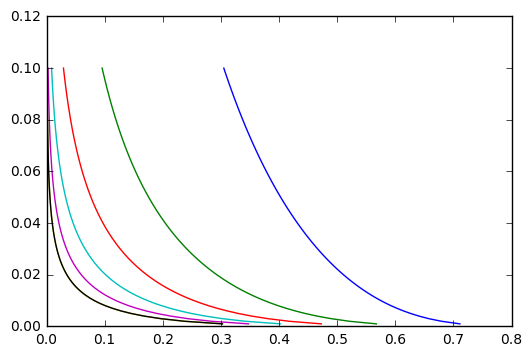

In [4]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

rr = Symbol('r')
x0 = Symbol('x0')
ss = Symbol('s')
f = 1/rr # 被积函数
hh = integrate(f,(rr,x0,x0+ss)) #精确的定积分

# 根据高斯积分格式，返回相对误差的计算公式
def test1(nrule):
    W,P = getWeightAndPoint_S(nrule) # 得到标准的高斯积分格式
    P = np.array(P) # 得到实际的积分点，step1
    PP = x0+(P+1.)/2.*ss # 得到实际的积分点，step2
    WW = np.array(W)/2.*ss # 得到实际的积分权重
    approx = np.sum(np.dot(WW,1./PP)) # 得到高斯积分的计算公式
    exact = hh # 得到精确的定积分
    return abs((approx-exact)/exact) # 返回相对偏差

# 利用数值方法得到各种格式的阈值
import scipy.optimize as opt

ttt = np.linspace(0.001,0.1,100) # 画图变量
thresholds = list() # 空的阈值矩阵
orders = [0,1,2,3,4,5,6] # 5中常用的积分阶次
for segLength in [1,]: # 对区间长度的备选进行迭代
    threshold_seg = np.array(orders)*0. # 空的阈值向量
    for idd, xx in enumerate(orders): # 对空间阶次进行迭代
        tthg = lambda tt: test1(xx).subs(ss,segLength).subs(x0,tt).evalf()-0.01 # 定义求根方程
        plt.plot([tthg(tx)+0.01 for tx in ttt],ttt) # 将求根方程进行绘制
        try:
            x,r = opt.bisect(tthg,0.0001,10,xtol=1.e-4,rtol=1.e-4,maxiter=1000,full_output=True,disp=True) # 利用二分法进行求根
            threshold_seg[idd] = x # 将根进行保存
#             print r
        except RuntimeError as re:
            print "RuntimeError: ", e
        except ValueError as ve:
            print "ValueError:", e
        pass
    print segLength # 打印区间长度
    print threshold_seg # 打印阈值向量
    thresholds.append(threshold_seg) # 保存阈值向量到阈值矩阵

plt.show() # 显示绘制图像

##
# 由于1/x存在缩放，故可以只算s=1的
# 对s=10乘上10，得到相应的阈值
# 对s=2乘上2，得到相应的阈值
# ...
##


根据距离得到相应的积分阶数

In [5]:
from sympy import *
import numpy as np

def genRules(length,nns):
    # 下面的方法只能得到阶次为0-5之间的判定阈值，扩展阶次，必须有精确的高斯积分格式
    try:
        # 通过对标准的1/（x-1）进行缩放得到判定的阈值
        temp = np.array([ 2.39836473,  0.42509357,  0.17401656,  0.09392856,  0.05845157, 0.03971757])*length
        b = temp[:len(nns)]
        return b
    except Exception as e:
        print e
        raise
        
def selRule(dist, rules,tables ): # 查表得到相应与dist的最小高斯积分阶次
    try:
        # 从大往小排查，得到相应的高斯积分阶次
        for ii in xrange(len(tables)): # 从大往小迭代
            # 判断是否在阈值范围内
            if dist >= tables[ii]: #在阈值的范围内
                return rules[ii] # 通过配比，返回相应的阶次
            else: # 否则
                pass # 继续迭代
        return rules[-1] # 如果没有配比成功，则返回最高相应的阶次
    except Exception as e:
        print e
        raise

<h2>关于网格</h2>

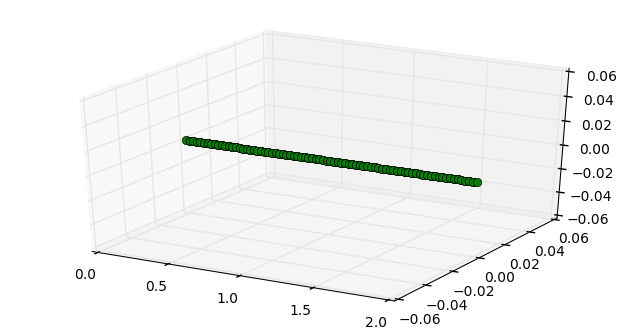

In [6]:
# 画一条直线段
start_p = 0.
end_p = 2
number_p = 80
ls = np.linspace(start_p,end_p,number_p)
lm = (end_p-start_p)/(len(ls)-1.)

try:
    mesh2 = [[np.array((ls[ii],0,0)), np.array((ls[ii+1],0,0)), lm, 0.1*lm, np.array([0,0,1])] for ii in xrange(len(ls)-1)]
    mesh2_attached = [{'Port':[False,0],'V_e':[False,0]} for _ in mesh2]
#     for cell in mesh2:
#         print cell
except Exception as e:
    print e
    raise

# 设置端口
try:
    mesh2_attached[39]["Port"] = [True,0]
    mesh2_attached[39]["V_e"] = [True,0]
except Exception as e:
    print e
    raise

# 将网格进行绘制
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4))#创建绘制窗口
ax = fig.gca(projection = "3d")#3d坐标轴
ax.hold
try:
    for idd, cell in enumerate(mesh2):
        data_x = [cell[0][0], cell[1][0]]
        data_y = [cell[0][1], cell[1][1]]
        data_z = [cell[0][2], cell[1][2]]
        ax.plot(data_x,data_y,data_z,"b-",label=u"处理曲线",linewidth=0.5)#处理曲线
        ax.plot(data_x,data_y,data_z,"go",linewidth=0.5)#处理曲线
        if mesh2_attached[idd]['V_e'][0]==True:
            ax.plot(data_x,data_y,data_z,"r-",linewidth=2)#处理曲线
        
except Exception as e:
    print e
    
plt.show()

<h2>关于矩量法的实现</h2>

In [7]:
import numpy as np
from scipy import constants as C
import scipy

# 剖分网格，得到$\{r_m\}$和线段$\{(r_{m-1},r_m,l_m, a_m)\}$
# 设置厚度$a$
mesh = mesh2

# 设置基本参数
epsi = C.epsilon_0 #设置介电常数
mu = C.mu_0 # 设置磁导率
vec = 1./np.sqrt(epsi*mu) # 计算光速

freq = 300e6 #设置频率
circleFreq = 2*np.pi*freq # 计算圆频率
wavelength = vec/freq # 计算波长
wavenumber = 2*np.pi/wavelength # 计算波数

# 根据剖分长度计算不同阶次高斯积分的区间段
rules = (0,1,2,3,4,5) # 指定典型的积分阶次
quads = list()
try:
    for xx in mesh:
        quads.append(genRules(xx[2],rules)) # 计算每个线段积分判定的阈值
except Exception as e:
    print e
    raise
    
pi4 = np.pi*4. #预先计算公共因子 
jOmegaMuPi4 = circleFreq*mu/pi4*1.j #预先计算公共因子 
_jOmegaEpsPi4 = -1.j/circleFreq/epsi/pi4 # 预先计算公共因子
jK = 1.j*wavenumber # 预先计算公共因子

# print quads        

<h3>阻抗矩阵元素</h3>

如果 $n=m$，那么
$$
Z_{mm} = \dfrac{j\omega\mu l_m }{4\pi}\left(ln\dfrac{\sqrt{1+(2a_m/l_m)^2}+1}{\sqrt{1+(2a_m/l_m)^2}-1}-jkl_m\right)
-\dfrac{l_m^2}{j\omega\varepsilon}\dfrac{1+jkR}{4\pi R^3}e^{-jkR}
$$
经过近似和化简有
$$
Z_{mm} = \dfrac{j\omega\mu l_m }{4\pi}\left(ln\dfrac{\sqrt{1+(2a_m/l_m)^2}+1}{\sqrt{1+(2a_m/l_m)^2}-1}-jkl_m\right)
-\dfrac{l_m^2}{j\omega\varepsilon}\dfrac{1}{4\pi R^3}
$$
其中
$$
R = \sqrt{l_m^2/4+a_m^2}
$$

如果$m\neq n$，那么
$$
Z_{nm}=j\omega\mu\frac{(r_n-r_{n-1})\cdot(r_m'-r_{m-1}')}{l_m}\sum_p W_p\dfrac{e^{-jkR_p}}{4\pi R_p}
-\dfrac{1}{j\omega\varepsilon}(r_n-r_{n-1})\cdot (r_n^c-r')\dfrac{1+jkR_e}{4\pi R_e^3}e^{-jkR_e}|_{r'=r_m'}^{r'=r_{m-1}'}
$$
其中
$$
R_e = |r_n^c-r'|
$$ 
$$
r_n^c = (r_n+r_{n-1})/2+a_n
$$
$$
R_p=|r_n^c-r_p'|
$$

In [8]:
import numpy as np
# 循环迭代 产生矩阵
try:
    Z = np.zeros((len(mesh),len(mesh)),dtype=complexfloating) #阻抗矩阵
except Exception as e:
    print e
    raise    
for n,seg_n in enumerate(mesh): # 遍历所有测试
    try:
        r_nc = (seg_n[0]+seg_n[1])/float(2)+seg_n[4]*seg_n[3] # 计算测试的中心点
        vec_n = (seg_n[1]-seg_n[0]) # 计算测试的向量
        an = seg_n[3] #偏置的长度
        ln = seg_n[2] # 线段的长度
    except Exception as e:
        print e
        raise
    for m,seg_m in enumerate(mesh):  # 遍历所有展开
        temp = 0+0.j 
        # 判断是否重合
        if n==m: # 重合
            try:
                am = seg_m[3]
                lm = seg_m[2]
            except Exception as e:
                print e
                raise
            # 计算 $R = \sqrt{l_m^2/4+a_m^2}$
            try: 
                R = np.sqrt(lm**2/4.+am**2)
            except Exception as e:
                print e
                raise
            # 计算$$Z_{mm} = \dfrac{j\omega\mu l_m }{4\pi}\left(ln\dfrac{\sqrt{1+(2a_m/l_m)^2}+1}{\sqrt{1+(2a_m/l_m)^2}-1}-jkl_m\right)-\dfrac{l_m^2}{j\omega\varepsilon}\dfrac{1}{4\pi R^3}$$
            try:
                temp = jOmegaMuPi4*lm*(scipy.log((np.sqrt(1+(2*am/lm)**2)+1)/(np.sqrt(1+(2*am/lm)**2)-1))-jK*lm)
#                 temp = temp-_jOmegaEpsPi4*lm**2/R**3
                temp = temp
            except Exception as e:
                print e
                print seg_m
                raise
        else: #  不重合
            try:
                vec_m = seg_m[1]-seg_m[0] # 计算展开的向量
                lm = seg_m[2] # 线段的长度     
            except Exception as e:
                print e
                raise
            # 根据线段距离选择计算方式
            dist = 1 # 计算两线段间的距离
            try:
                deltas = [seg_n[0]-seg_m[0],seg_n[1]-seg_m[0],seg_n[0]-seg_m[1],seg_n[1]-seg_m[1]] #计算端点间间距 step 1
                dist = np.min([np.dot(xx,xx) for xx in deltas]) # step 2
                dist = np.sqrt(dist) # step 3
            except Exception as e:
                print e
                raise
            # print dist
            # 选择不同的积分方式
            try:
                orderGauss = selRule(dist,rules,quads[m]) #根据距离选择不同的积分阶
            except Exception as e:
                print e
                raise
            try:
                W,P = getWeightAndPoint_S(orderGauss) #根据阶级得到标准的高斯积分权重和位置
                W = np.array(W)*lm/float(2) #计算权重
                P = np.array(P)
            except Exception as e:
                print e
                raise
            # 计算R_p=|r_n^c-r_p'|
            try:
                r_pp = [seg_m[0]+(0.5*pp+0.5)*(seg_m[1]-seg_m[0]) for pp in P] #计算积分点
                R_p = [np.dot(r_nc-xx,r_nc-xx) for xx in r_pp] #计算积分点和测试点之间的距离-step1
                R_p = np.sqrt(R_p) #计算积分点和测试点之间的距离-step2
                # 计算\sum_p W_p\dfrac{e^{-jkR_p}}{4\pi R_p}       
                temp_1 =  scipy.sum(W*scipy.exp(-jK*R_p)/R_p)
                # 计算\frac{(r_n-r_{n-1})\cdot(r_m'-r_{m-1}')}{l_m}\sum_p W_p\dfrac{e^{-jkR_p}}{4\pi R_p}
                temp_1 = temp_1*np.dot(vec_n,vec_m)/lm
                # print temp_1
            except Exception as e:
                print e
                raise           
            # 计算R_e = |r_n^c-r'|
            try:
                r_p = [seg_m[0],seg_m[1]]
                R_e = [np.dot(r_nc-xx,r_nc-xx) for xx in r_p] #计算端点和测试点之间的距离-step1
                R_e = np.sqrt(R_e) #计算端点和测试点之间的距离-step2      
                # 计算 \dfrac{1+jkR_e}{4\pi R_e^3}e^{-jkR_e}|_{r'=r_m'}^{r'=r_{m-1}'}
                tempRe = ((float(1)+jK*R_e)/R_e**3)*scipy.exp(-jK*R_e)
                # 计算(r_n-r_{n-1})\cdot (r_n^c-r')\dfrac{1+jkR_e}{4\pi R_e^3}e^{-jkR_e}|_{r'=r_m'}^{r'=r_{m-1}'}
                temp_2 = tempRe[0]*(r_nc-seg_m[0])-tempRe[1]*(r_nc-seg_m[1]) # step1
                temp_2 = np.dot(temp_2,vec_n) # step2                
                # print temp_2
            except Exception as e:
                print e
                raise            
            # 计算 j\omega\mu\frac{(r_n-r_{n-1})\cdot(r_m'-r_{m-1}')}{l_m}\sum_p W_p\dfrac{e^{-jkR_p}}{4\pi R_p}-\dfrac{1}{j\omega\varepsilon}(r_n-r_{n-1})\cdot (r_n^c-r')\dfrac{1+jkR_e}{4\pi R_e^3}e^{-jkR_e}|_{r'=r_m'}^{r'=r_{m-1}'}
#             temp = temp_1*jOmegaMuPi4-temp_2*_jOmegaEpsPi4
            temp = temp_1*jOmegaMuPi4
        try:
            Z[n][m]=temp/ln # 存放
        except Exception as e:
            print e
            raise
# print Z_re
# print Z_im
# print Z


<h3>右端项</h3>
通用表达式是
$$
V_n = \dfrac{r_n-r_{n-1}}{|r_n-r_{n-1}|}\cdot E^s(r_n^c) 
$$
对于缝隙电压源模型（最常见的馈电模型）
$$
E_i(r) = V\delta(r)\hat E
$$
此时
$$
V_n = \left\{
\begin{array}{cl}
\dfrac{(r_n-r_{n-1})\cdot \hat E}{|r_n-r_{n-1}|}, & \text{l_n is port}\\
0, & other\\
\end{array}
\right.
$$
对于平面波激励模型（常见于散射特性分析）
$$
E_i(r)=e^{-j\bar k\cdot \bar r}\hat E
$$

In [9]:
import numpy as np
import scipy
mesh_attached = mesh2_attached

# 循环迭代 产生右端向量和左端加载量
try:
    V = np.zeros((len(mesh_attached),1),dtype=complexfloating) #右端向量
except Exception as e:
    print e
    raise    
try:
    L = np.zeros((len(mesh_attached),1),dtype=complexfloating) #左端加载量
except Exception as e:
    print e
    raise    
for n,seg_n in enumerate(mesh_attached): # 遍历所有测试
    try:
        # 判断是否是加载电压源的单元
        if seg_n['Port'][0] == True and seg_n['V_e'][0] == True: # 是
            temp = scipy.exp(-1.j*seg_n['V_e'][1]) # 根据指定相位差计算右端 step1
            V[n] = temp # step 2
        else: # 不是
            V[n] = float(0) # 指定为右端项为0
    except Exception as e:
        print e
        raise
    try:
        # 判断是否有加载阻抗的单元
        if seg_n['Port'][0] == True: # 是
            temp = seg_n['Port'][1]
            L[n] = temp # step 2
        else: #
            L[n] = float(0) # 指定为右端项为0
    except Exception as e:
        print e
        raise

# print V_re
# print V_im
# print V
# print L
    

<h2>矩阵方程的求解</h2>

In [10]:
import scipy.linalg
try:
    M = Z - np.diag(L[:,0])
    I = scipy.linalg.solve(M,V)
except Exception as e:
    print e

<h2>电流的显示</h2>

从这里可以检查结果。
通过和常识进行比较，发现结果有问题。

问题1：随着长度的变化，未出现谐振的变化

问题2：出现的电流虚部比实部明显大

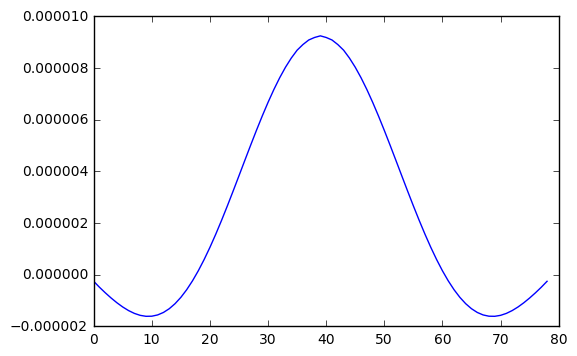

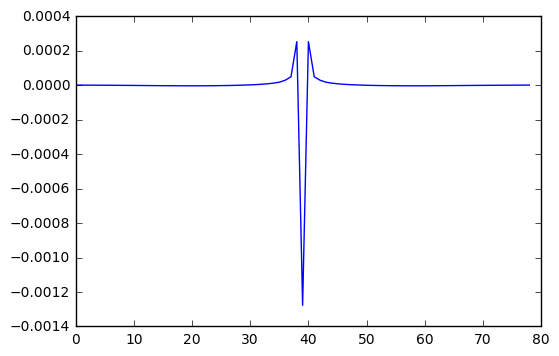

In [11]:
# 将网格进行绘制
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

plt.plot(xrange(len(I)),scipy.real(I))
plt.show()

plt.plot(xrange(len(I)),scipy.imag(I))
plt.show()

<h2>方向图计算</h2>

下图给出了在笛卡尔坐标系$(x,y,z)$下,球坐标系$(r,\theta,\phi)$的矢量表示
<img src="polar_system.png",width=300>
根据图示，我们有
$$
\begin{array}{rcl}
\hat k &=& [sin\theta cos\phi,sin\theta sin\phi,cos\theta]\\
\hat \theta &=& [cos\theta cos\phi,cos\theta sin\phi,-sin\theta]\\
\hat \phi &=& [-sin\phi,cos\phi,0]\\
\end{array}
$$

在此基础上，考察下面的电场远区表达式
$$
\begin{array}{rcl}
\bar E &=& j\omega\mu\dfrac{e^{-jkR}}{4\pi R} \sum_n I_n \bar I_n \int_{L_n}  e^{j\bar k\cdot \bar r}dl\\
&=&j\omega\mu\dfrac{e^{-jkR}}{4\pi R} \sum_n I_n (r_n-r_{n-1})  e^{jk\hat k\cdot \bar r_n^c}\\
\end{array}
$$
从而有
$$
E_\theta = \bar E\cdot \hat \theta = j\omega\mu\dfrac{e^{-jkR}}{4\pi R} \sum_n I_n  (r_n-r_{n-1})\cdot \hat \theta e^{jk\hat k\cdot \bar r_n^c}
$$
和
$$
E_\phi = \bar E\cdot \hat \phi = j\omega\mu\dfrac{e^{-jkR}}{4\pi R} \sum_n I_n  (r_n-r_{n-1})\cdot \hat \phi e^{jk\hat k\cdot \bar r_n^c}
$$



In [89]:
import numpy as np
import scipy

# 定义与集合相应的方向图
def genRadiationPattern(ths_phs):
    RPs_th = [0 for _ in ths_phs]
    RPs_ph = [0 for _ in ths_phs]

    # 定义一个辅助空间保存各个单元的因子，其作用是利用向量乘积的办法计算远处的电场
    try:
        RP_sep_th = np.zeros((len(mesh),1),dtype=complexfloating) # 定义空间，并初始化为零
        RP_sep_ph = np.zeros((len(mesh),1),dtype=complexfloating) # 定义空间，并初始化为零
    except Exception as e:
        print e
        raise   

    # 对方向角度中的集合进行迭代
    for iid,th_ph in enumerate(ths_phs):

        th0,ph0 = th_ph # 俯仰角和方位角
        # 根据俯仰角和方位角计算三个向量
        jk_bar = np.array([scipy.sin(th0)*scipy.cos(ph0),scipy.sin(th0)*scipy.sin(ph0),scipy.cos(th0)])*wavenumber*1.j # 1.j*k向量
        th_hat = np.array([scipy.cos(th0)*scipy.cos(ph0),scipy.cos(th0)*scipy.sin(ph0),-scipy.sin(th0)]) # theta分量
        ph_hat = np.array([-scipy.sin(ph0),scipy.cos(ph0),0]) # phi分量

        # 对网格进行迭代
        for n,seg_n in enumerate(mesh): 
            try:
                r_nc = (seg_n[0]+seg_n[1])/2. # 单元的中间点
                temp_e = scipy.exp( scipy.dot(jk_bar,r_nc) ) # 方向图step1
                temp_th = scipy.dot((seg_n[1]-seg_n[0]),th_hat) # 方向图step2
                temp_ph = scipy.dot((seg_n[1]-seg_n[0]),ph_hat) # 方向图step2
                if scipy.absolute(temp_th)<1.e-10: 
                    RP_sep_th[n] = 0. # 方向图step3
                else:
                    RP_sep_th[n] = temp_th*temp_e # 方向图step3
                if scipy.absolute(temp_ph)<1.e-10: 
                    RP_sep_ph[n] = 0. # 方向图step3
                else:
                    RP_sep_ph[n] = temp_ph*temp_e # 方向图step3
    #             print RP_sep[n]
            except Exception as e:
                print e
                raise
        try:         
            RPs_th[iid] = scipy.sum(scipy.dot(I[:,0],RP_sep_th)) # 将各个单元的方向图进行综合
            RPs_ph[iid] = scipy.sum(scipy.dot(I[:,0],RP_sep_ph)) # 将各个单元的方向图进行综合
        except Exception as e:
            print e
            raise
    return [RPs_th,RPs_ph]

relative value


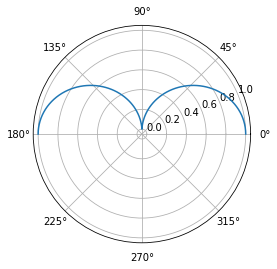

absolute value


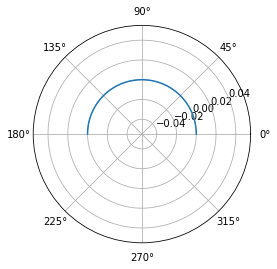

relative value


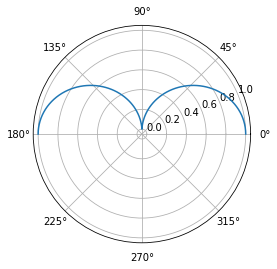

In [90]:
# 指定方向角集合
ths = np.linspace(0,np.pi,101)
ths_phs = [(xx,np.pi*0.) for xx in ths]
            
RPs_th,RPs_ph = genRadiationPattern(ths_phs)

import matplotlib.pylab as plt

try:
    aug_rp_th = scipy.absolute(RPs_th)
    max_rp_th = np.max(aug_rp_th)
    if max_rp_th != 0: 
        print "relative value"
        plt.polar(ths,aug_rp_th/max_rp_th)
        plt.show()        
    else:
        print "absolute value"
        plt.polar(ths,aug_rp_th)
        plt.show()
        pass
except Exception as e:
    print e

try:
    aug_rp_ph = scipy.absolute(RPs_ph)
    max_rp_ph = np.max(aug_rp_ph)
    if max_rp_ph != 0: 
        print "relative value"
        plt.polar(ths,aug_rp_ph/max_rp_ph)
        plt.show()
    else:
        print "absolute value"
        plt.polar(ths,aug_rp_ph)
        plt.show()
except Exception as e:
    print e
    
try:
    aug_rp = scipy.sqrt(scipy.absolute(RPs_ph)**2+scipy.absolute(RPs_th)**2)
    max_rp = np.max(aug_rp)
    if max_rp != 0: 
        print "relative value"
        plt.polar(ths,aug_rp/max_rp)
        plt.show()
    else:
        print "absolute value"
        plt.polar(ths,aug_rp)
        plt.show()
except Exception as e:
    print e

<h2>关于特征值分析</h2>

In [49]:
import scipy.linalg
import numpy.linalg

# a,b = scipy.linalg.eig?
try:
    X = Z_re
    R = Z_im
    a,b = scipy.linalg.eig(X,R)
    print a
    print b
#     for kk in xrange(len(a)):
#         print np.dot((X-a[kk]*R),b[:,kk:(kk+1)])
except scipy.linalg.LinAlgError as lae:
    print lae
except Exception as e:
    print e


[ 5.61245605e-06+0.j -4.60196327e-08+0.j -2.54592573e-08+0.j
 -1.52339619e-08+0.j -1.13362165e-08+0.j -8.82188476e-09+0.j
 -7.47346648e-09+0.j -6.56362637e-09+0.j -5.74484165e-09+0.j
 -6.04023572e-09+0.j]
[[ 0.1553887  -0.24673355 -0.29650033 -0.39381781 -0.38374099 -0.41645458
  -0.3475466  -0.31309156  0.11591441  0.20480445]
 [ 0.25783157 -0.39286213 -0.32543964 -0.30589682 -0.02869971  0.13728396
   0.36835045  0.42539957 -0.22873841 -0.3958305 ]
 [ 0.32975177 -0.41616439 -0.09807464  0.13664488  0.44941019  0.38447492
   0.1237713  -0.23728812  0.32191774  0.41647086]
 [ 0.37613798 -0.31324931  0.24250261  0.42478828  0.25742477 -0.23726436
  -0.40115608 -0.11647333 -0.3887784  -0.33944029]
 [ 0.39895016 -0.1160344   0.4875966   0.22851205 -0.28927867 -0.32187475
   0.25939115  0.38876367  0.42363063  0.11271941]
 [ 0.39895016  0.1160344   0.4875966  -0.22851205 -0.28927867  0.32187475
   0.25939115 -0.38876367 -0.42363063  0.11271941]
 [ 0.37613798  0.31324931  0.24250261 -0.4247

<h2> 关于矩阵元素特点的分析 </h2>

由积分方程的表达式可见，
$$
\begin{array}{rcl}
E^s(r)&=&j\omega\mu\int_{L'} {I(r')\dfrac{e^{-jkR}}{4\pi R}dl'}
+\dfrac{1}{j\omega\varepsilon}\nabla \int_{L'} \nabla'\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}dl'\\
&=&E_1(r)+E_2(r)
\end{array}
$$
$E_s$可以分成两个部分（分别是磁矢量位和电标位），其中
$$R=|r-r'|$$
$$E_1(r)=j\omega\mu A = j\omega\mu\int_{L'} {I(r')\dfrac{e^{-jkR}}{4\pi R}dl'}$$
$$E_2(r)=\nabla \Phi =\dfrac{1}{j\omega\varepsilon}\nabla \int_{L'} \nabla'\cdot I(r')\dfrac{e^{-jkR}}{4\pi R}dl'$$

下面简单分析近场部分的元素特性。此时相位的因素可以被忽略，分析的方法借鉴静电场和稳恒电流的分析办法。

<h3>采用脉冲电流展开，则有如下特性</h3>

从下图<img src="electric_field.png", width=300>说明由电荷激发的电场在单元附近的不同区域测试必然会出现符号相反的情况

从下图<img src="electric_field_byJ.png", width=300>说明由电流激发的电场在单元附近的不同区域测试必然会出现符号相反相同的情况

在远些的区域则由于$e^{-jkR}$(分布的辐射电阻和耦合电容)的原因，使得测试的符号情况变得更加复杂

而阻抗的符号则是两者的叠加。当频率很小的时候，则体现的是电荷的激发场；当频率相对较大时候，则体现的是电流的激发场（后者不容易出现）

<h3> 采用线性电流展开，则有如下的特性</h3>

从下图<img src="electric_field2.png", width=300><img src="electric_field3.png", width=300>说明此时在单元处的电荷激发的电场的水平测试为零（很小），而在两段则呈现符号相反的情况

从下图<img src="electric_field_byJ2.png", width=300><img src="electric_field_byJ3.png", width=300>说明在单元处的电流激发的电场的水平测试为正，而在两段则呈现符号相同但一大一小的非对称情况

需要说明的是，通常RWG基函数展开的时候，就不考虑端点处的大电荷。这种处理实际上是不严格的。但是考虑到此时电荷激发的电场的水平测试很小，这种处理也是可以接受的。